In [2]:
import scipy.io as scio
import numpy as np
import os
from tqdm.auto import tqdm, trange
import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import r2_score
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
#get data of light and npc spectrum use pytorch
lightFile = '/Users/sheeta/Desktop/learn_torch/Room_light.mat'
lightdata = scio.loadmat(lightFile)
lightdata = torch.Tensor(lightdata['light'])
light = torch.transpose(lightdata,0,1)
npcFile = '/Users/sheeta/Desktop/learn_torch/NPC_database.mat'
npcdata = scio.loadmat(npcFile)
npcdata = torch.Tensor(npcdata['NPC_spec'])

npc = torch.transpose(npcdata,0,1)
noise_npc = torch.where(light[1]>0.13, torch.zeros_like(npc), npc)
mask = torch.where(light[1]>0.13, torch.zeros_like(npc), torch.ones_like(npc))
noise_npc = [noise_npc, mask]

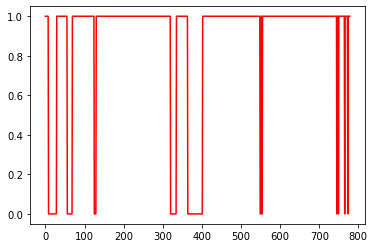

In [4]:
plt.plot(mask[0],'red')


In [7]:
light[1].size()

torch.Size([779])

In [3]:
npcFile = '/Users/sheeta/Desktop/learn_torch/NPC_database.mat'
data = scio.loadmat(npcFile)
npcdata = np.transpose(data['NPC_spec'])
controldata = np.transpose(data['control_spec'])


In [29]:
mix = np.concatenate((controldata, npcdata),axis = 0)

In [32]:
len(mix)
np.save("golden_standard",mix)

In [3]:
training_data = []
for i in range(len(npc)):
    training_data.append([np.array(noise_npc[0][i]),np.array(noise_npc[1][i]),np.array(npc[i])])              
np.save("training_data.npy",training_data)    

In [11]:
noise_npc

[tensor([[-7.3048e-03,  2.5976e-02,  5.6767e-02,  ...,  7.1595e-01,
           2.3011e-02, -6.6993e-01],
         [ 1.2336e-01,  5.9854e-02, -5.3992e-03,  ...,  6.0309e-01,
          -3.8910e-03, -6.1087e-01],
         [-6.1377e-03,  3.1418e-02,  6.6721e-02,  ...,  1.6721e+00,
           2.1738e+00,  2.6755e+00],
         ...,
         [-5.9408e-03,  8.3534e-02,  1.7175e-01,  ...,  2.4515e+00,
           2.8156e+00,  3.1797e+00],
         [-9.5568e-04,  5.1433e-02,  1.0358e-01,  ...,  2.3605e+00,
           2.7691e+00,  3.1776e+00],
         [-6.7781e-03,  1.1105e-01,  2.2719e-01,  ...,  1.0750e+00,
           1.1644e+00,  1.2539e+00]]),
 tensor([[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]])]

In [8]:

X1 = torch.Tensor([i[0] for i in training_data])
X2 = torch.Tensor([i[1] for i in training_data])
X = torch.stack((X1, X2), dim=1)
y = torch.Tensor([i[2] for i in training_data])

VAL_PCT = 0.1  # lets reserve 10% of our data for validation
val_size = int(len(X)*VAL_PCT)
print(val_size)

train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

NameError: name 'training_data' is not defined

In [5]:
hidden_dim = 64
layer_dim = 3
dropout = 0.2
learning_rate = 1e-3
weight_decay = 1e-6

# model_params = {'input_dim': input_dim,
#                 'hidden_dim' : hidden_dim,
#                 'layer_dim' : layer_dim,
#                 'output_dim' : output_dim,
#                 'dropout_prob' : dropout}
# net = get_model('lstm', model_params)


In [3]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__() 
        torch.manual_seed(20010315)
        self.conv1 = nn.Conv1d(2, 32,5 ,dilation = 3 ,padding = 6)
        self.conv2 = nn.Conv1d(32, 64, 5,dilation = 3,padding = 6) 
        self.conv3 = nn.Conv1d(64, 128, 5,padding = 6)
        self.D = nn.Dropout(0.2)
      #  self.lstm = nn.LSTM(input_size=len(orig_npc[0]), hidden_size=256, num_layers=3)
        x = torch.randn(2*779).view(-1,2,779)
        self._to_linear = None
        self.convs(x)
        self.fc1 = nn.Linear(self._to_linear, 779) #flattening.
   
    def convs(self, x):
        x = F.max_pool1d(F.leaky_relu(self.conv1(x)), (2))
        x = F.max_pool1d(F.leaky_relu(self.conv2(x)), (2))
        x = F.max_pool1d(F.leaky_relu(self.conv3(x)), (2))

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]
        return x
    

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # .view is reshape ... this flattens X before 
        x = self.D(x)
#         x = F.relu(self.fc1(x))
        x = self.fc1(x) # bc this is our output layer. No activation here.
        return x
net = CNN()

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


In [5]:
x = torch.randn(2*779).view(-1,2,779)

In [6]:
conv1 = nn.Conv1d(2, 32,5 ,dilation = 3 ,padding = 6)

In [7]:
x = F.max_pool1d(F.leaky_relu(conv1(x)), (2))

In [8]:
conv2 = nn.Conv1d(32, 64, 5,dilation = 3,padding = 6) 

In [10]:
x = F.max_pool1d(F.leaky_relu(conv2(x)), (2))

In [11]:
conv3 = nn.Conv1d(64, 128, 5,padding = 6)

In [12]:
x = F.max_pool1d(F.leaky_relu(conv3(x)), (2))

In [13]:
x.shape

torch.Size([1, 128, 101])

In [14]:
x = x.view(-1, 128*101)

In [15]:
fc1 = nn.Linear(128*101, 779)
x = fc1(x)

In [17]:
x.shape

torch.Size([1, 779])

In [19]:
def fwd_pass(X,y,train = False):
    if train:
        net.zero_grad()
    
    output = net(X)
    loss = loss_function(output,y)
    
    output = output.detach().numpy()
    score  = [r2_score(i,j) for i, j in zip(output, y)]
    score = np.mean(score)
    if train:
        loss.backward()
        optimizer.step()
    return loss, score
def test(size=32):
    with torch.no_grad():
        randome_start = np.random.randint(len(test_X)-size)
        X, y = test_X[randome_start:randome_start+size], test_y[randome_start:randome_start+size]
        loss,r2score = fwd_pass(X.view(-1, 2,779),y)
    return loss,r2score

loss, r2score = test(size = 412)
print(loss,r2score)

tensor(0.0636) 0.9538758804866787


In [14]:
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
loss_function = nn.MSELoss()
def train(net = net,
          epochs=10,
          BATCH_SIZE = 50):

    for e in trange(epochs):
        for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
            batch_X = train_X[i:i+BATCH_SIZE].view(-1,2,779)
            batch_y = train_y[i:i+BATCH_SIZE].view(-1,1,779).squeeze(1)
            loss,score = fwd_pass(batch_X, batch_y, train=True)
        print('Train','loss:', loss, 'score:' ,score )
        loss_test, r2score_test = test(size = 40)
        print('Test','loss:', loss_test, 'score:' ,r2score_test )
        
train()

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Train loss: tensor(0.1401, grad_fn=<MseLossBackward>) score: 0.8838016523895156
Test loss: tensor(0.1696) score: 0.8664048496257237


  0%|          | 0/75 [00:00<?, ?it/s]

Train loss: tensor(0.1202, grad_fn=<MseLossBackward>) score: 0.9046825042171193
Test loss: tensor(0.1483) score: 0.8887201281925521


  0%|          | 0/75 [00:00<?, ?it/s]

Train loss: tensor(0.0984, grad_fn=<MseLossBackward>) score: 0.9228243163524757
Test loss: tensor(0.1320) score: 0.8987536196436927


  0%|          | 0/75 [00:00<?, ?it/s]

Train loss: tensor(0.0799, grad_fn=<MseLossBackward>) score: 0.9368422474142013
Test loss: tensor(0.1069) score: 0.9237495957501111


  0%|          | 0/75 [00:00<?, ?it/s]

Train loss: tensor(0.0659, grad_fn=<MseLossBackward>) score: 0.9501979588723586
Test loss: tensor(0.0818) score: 0.9370075548130388


  0%|          | 0/75 [00:00<?, ?it/s]

Train loss: tensor(0.0608, grad_fn=<MseLossBackward>) score: 0.9582561433895163
Test loss: tensor(0.0803) score: 0.9400458642337618


  0%|          | 0/75 [00:00<?, ?it/s]

Train loss: tensor(0.0504, grad_fn=<MseLossBackward>) score: 0.9634845628157871
Test loss: tensor(0.0661) score: 0.9511484121472332


  0%|          | 0/75 [00:00<?, ?it/s]

Train loss: tensor(0.0501, grad_fn=<MseLossBackward>) score: 0.9649160894714074
Test loss: tensor(0.0649) score: 0.9516304209084515


  0%|          | 0/75 [00:00<?, ?it/s]

Train loss: tensor(0.0483, grad_fn=<MseLossBackward>) score: 0.9661853797278366
Test loss: tensor(0.0612) score: 0.953322075215717


  0%|          | 0/75 [00:00<?, ?it/s]

Train loss: tensor(0.0516, grad_fn=<MseLossBackward>) score: 0.9660684700286507
Test loss: tensor(0.0610) score: 0.957451977408321


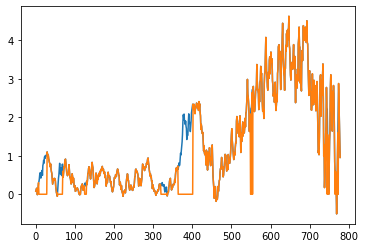

In [20]:

net_out1 = net(test_X[6].view(-1, 2, 779))

predict = net_out1[0].cpu().detach()
ground_truth = test_y[6]
noise = test_X[6][0]
            
#plt.plot(predict)
plt.plot(ground_truth) 
plt.plot(noise) 
plt.show()

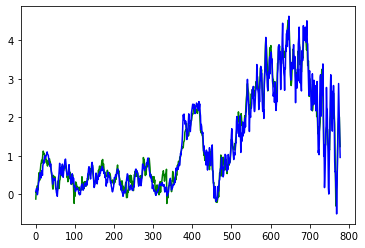

In [22]:
plt.plot(predict,'green')
plt.plot(ground_truth,'blue') 
#plt.plot(noise) 
plt.show()

In [776]:
noiselist = []
for i in range(779):
    if light[0][i]>0.13:
        noiselist.append(i)
        